In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, transforms

In [3]:
class Model_1(nn.Module):
    def __init__(self,):
        super(Model_1, self).__init__()
        self.linear1 = nn.Linear(1, 5)
        self.linear2 = nn.Linear(5, 10)
        self.linear3 = nn.Linear(10, 10)
        self.linear4 = nn.Linear(10, 10)
        self.linear5 = nn.Linear(10, 10)
        self.linear6 = nn.Linear(10, 10)
        self.linear7 = nn.Linear(10, 5)
        self.final = nn.Linear(5, 1)
    
    def forward(self,x):
        x = nn.functional.relu(self.linear1(x))
        x = nn.functional.relu(self.linear2(x))
        x = nn.functional.relu(self.linear3(x))
        x = nn.functional.relu(self.linear4(x))
        x = nn.functional.relu(self.linear5(x))
        x = nn.functional.relu(self.linear6(x))
        x = nn.functional.relu(self.linear7(x))

        x = self.final(x)
        return x

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


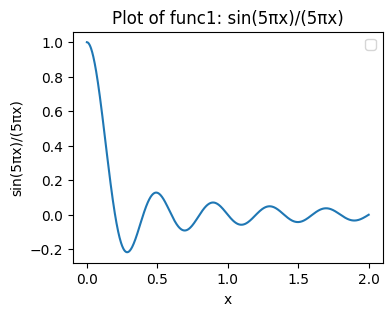

In [6]:
# Define the function
def func1(x):
    return np.sin(5 * np.pi * x) / (5 * np.pi * x)

# Generate x values
x1 = np.linspace(1e-6, 2, 1000)

# Compute y values
y1 = func1(x1)

# Plot the function
plt.figure(figsize=(4, 3))
plt.plot(x1, y1)
plt.title('Plot of func1: sin(5πx)/(5πx)')
plt.xlabel('x')
plt.ylabel('sin(5πx)/(5πx)')
plt.legend()
plt.show()


In [13]:
loss_func = torch.nn.MSELoss()
model_1_func1 = Model_1()

optimizer_model1_func1 = torch.optim.Adam(model_1_func1.parameters(), lr=0.0001)


input = torch.tensor(x1).unsqueeze(1).float()
label = torch.tensor(y1).unsqueeze(1).float()

max_epoch = 5000

model_1_func1_loss = []
model_1_func1_grad = []

for i in range(max_epoch):
    pred_model1_func1 = model_1_func1(input)
    loss = loss_func(pred_model1_func1, label)
    optimizer_model1_func1.zero_grad() 
    loss.backward() 
    optimizer_model1_func1.step()
    model_1_func1_loss.append(loss.item())

    grad_all = 0.0
    for p in model_1_func1.parameters():
        grad = 0.0
        if p.grad is not None:
            grad = (p.grad.cpu().data.numpy()**2).sum()
        grad_all += grad
    grad_norm = grad_all ** 0.5
        
    model_1_func1_grad.append(grad_norm)

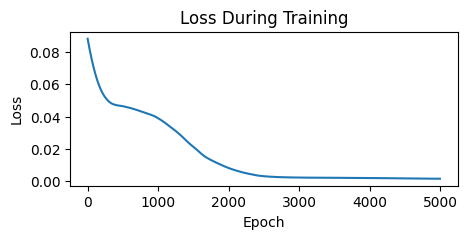

In [17]:
plt.figure(figsize=(5,2))
plt.plot(model_1_func1_loss)
plt.title('Loss During Training')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

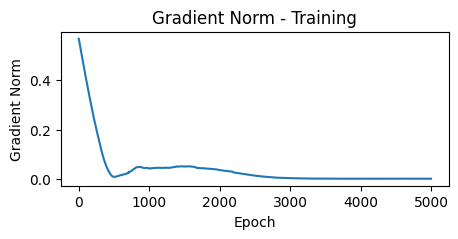

In [18]:
plt.figure(figsize=(5,2))
plt.plot(model_1_func1_grad)
plt.title('Gradient Norm - Training')
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.show()

In [5]:
batch_size = 1024

trainset = torchvision.datasets.MNIST('data', train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
train_loader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle=True)

testset = torchvision.datasets.MNIST('data', train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))
test_loader = torch.utils.data.DataLoader(testset ,batch_size = batch_size, shuffle=True)

In [6]:
class Model (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [11]:
device = 'mps' if torch.cuda.is_available() else 'cpu'
num_epochs = 100
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

model_loss = []
model_grad = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device).reshape(-1, 28*28)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    model_loss.append(loss.item())
    
    grad_all = 0.0
    for p in model.parameters():
        grad = 0.0
        if p.grad is not None:
            grad = (p.grad.cpu().data.numpy()**2).sum()
        grad_all += grad
    grad_norm = grad_all ** 0.5
        
    model_grad.append(grad_norm)


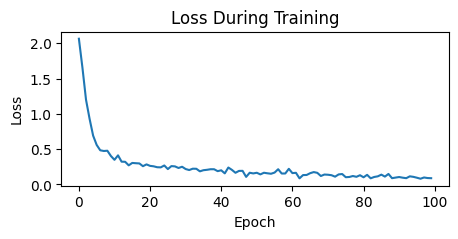

In [12]:
plt.figure(figsize=(5,2))
plt.plot(model_loss)
plt.title('Loss During Training')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

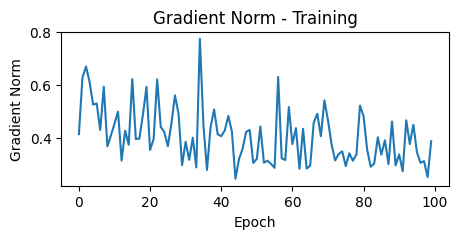

In [13]:
plt.figure(figsize=(5,2))
plt.plot(model_grad)
plt.title('Gradient Norm - Training')
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.show()